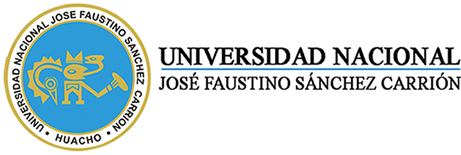

Tema: **ANÁLISIS UNIVARIADO Y MULTIVARIADO DE DATOS**

Doc: Victor Guevara Ponce

2023-II

# <center> **ANÁLISIS UNIVARIADO Y MULTIVARIADO DE DATOS**



Cuando no enfrentamos a un problema de predicción, ya sea una tarea de clasificación o regresión, para poder entrenar un algoritmo de machine learning debemos tener un conjunto de datos (Inputs, Variables independiente, atributos, etc) que permitan construir un modelo adecuado.

Siempre no vamos a enfrentar a multiples variariables o atributos es por ello que debemos realizar un análisis multivariado de los datos.



Las tareas involucradas en la evaluación de los datos pueden parecer intrascendentes, pero son una parte esencial de cualquier análisis multivariado.
Las técnicas multivariadas ponen un enorme poder analítico en manos del investigado o desarrollador de modelos preditivos.
Pero también imponen una mayor carga al investigador para garantizar que los fundamentos estadísticos y teóricos de en los que se basan también son compatibles.
Al examinar los datos antes de la aplicación de cualquier técnica multivariante,
el investigador obtiene varios conocimientos críticos sobre las características de los datos:


*   **En primer lugar, el investigador alcanza una comprensión básica de los datos y las relaciones entre las variables.**

> Las técnicas multivariadas imponen mayores exigencias al investigador para comprender, interpretar y articular los resultados.


> basado en relaciones no permite un conocimiento profundo de la variable objetivo.


> Las interrelaciones pueden ayudar enormemente en la especificación y refinamiento del modelo planteado, así como proporcionan una perspectiva razonada para la interpretación de los resultados.

 *   **En segundo lugar, el investigador se asegura de que los datos subyacentes al análisis cumplan con todos los requisitos para una analisis correcto.**


> Desde la estadística las técnicas multivariadas exigen mucho más de los datos en términos de datos más grandes.


> Conjuntos y supuestos más complejos que los encontrados con los análisis básicos.

> Falta de datos (Missing), valores atípicos, y las características estadísticas de los datos son mucho más difíciles de evaluar en un contexto multivariado.

Por lo tanto, la sofisticación analítica necesaria para garantizar que se cumplan estos requisitos obliga al investigador utilizar una serie de técnicas de análisis de datos que son tan complejas como las técnicas multivariadas.

# CASO:

In [ ]:
#Importamos algunas librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Proyecto machine learning


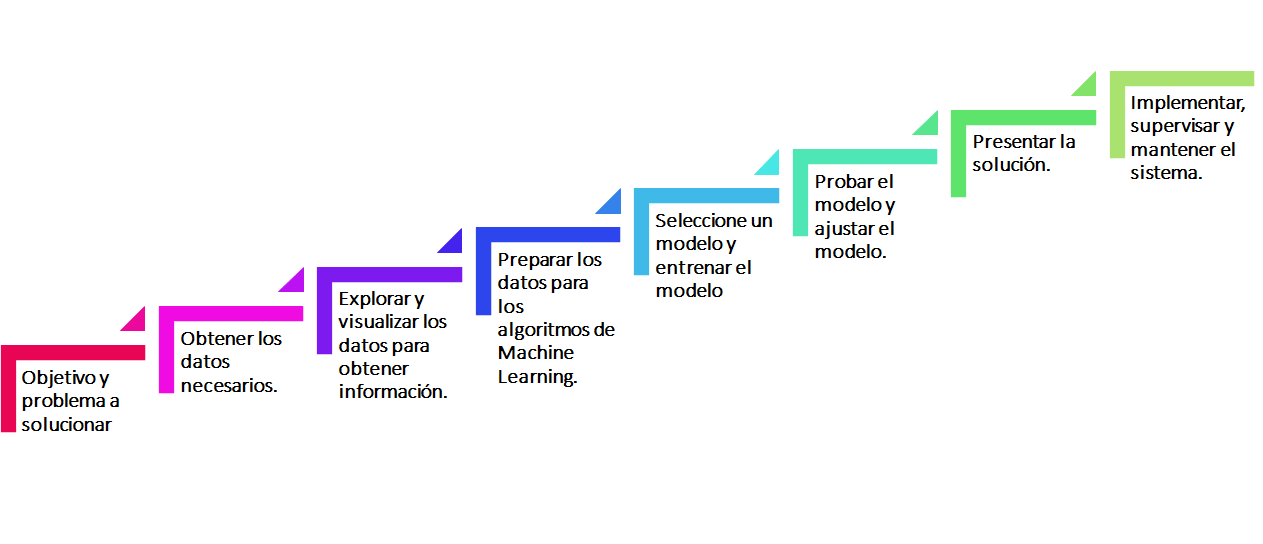![image.png](attachment:image.png)
* Proceso proyecto machine learning

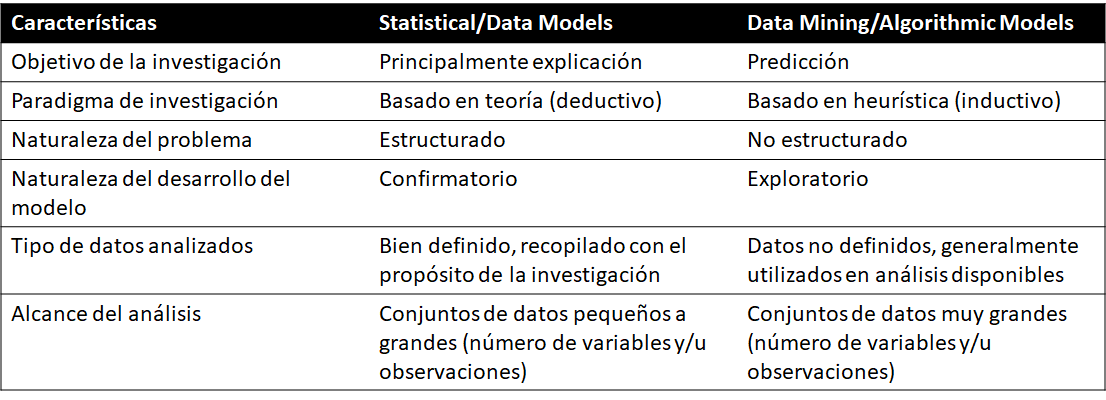

## 1. OBJETIVO
**Evaluar si en una familia hay posibilidad de comprar una maquina cortacespedes.**


## 2. Obtener los datos necesarios

* **Gastos**. Gasto aproximado del cliente en arreglos césped (Cientos de S/)
* **Ingresos** Ingreso aproximado del cliente (Miles de S/)
* **Tamaño de lote** Tamaño del lote del cliente
* **compra** Si el cliente compró o no una máquina


## 3. Explorar y visualizar los datos

In [ ]:
#Cargamos los datos
caso=pd.read_csv("https://raw.githubusercontent.com/VictorGuevaraP/ME-Machine-Learning/master/Cortacespedes.csv", sep=";", encoding="latin")

In [ ]:
caso.head()

,Id,Gastos,Ingresos,Tamaño lote,compra
0,CC001,28,60.0,18.4,Si
1,CC002,6,85.5,16.8,Si
2,CC003,20,64.8,21.6,Si
3,CC004,16,61.5,20.8,Si
4,CC005,14,87.0,23.6,Si


In [ ]:
caso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           24 non-null     object 
 1   Gastos       24 non-null     int64  
 2   Ingresos     24 non-null     float64
 3   Tamaño lote  24 non-null     float64
 4   compra       24 non-null     object 
dtypes: float64(2), int64(1), object(2)
memory usage: 1.1+ KB


# Tipo de datos Python
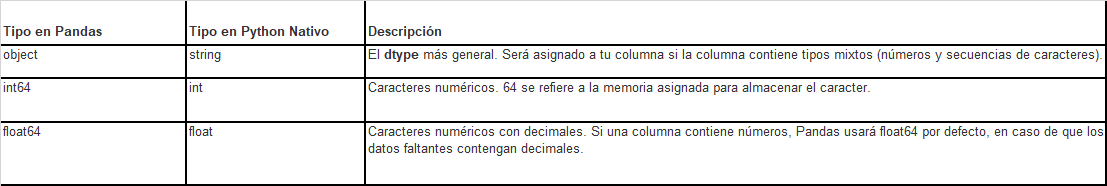

In [ ]:
#Verificar el tipo de datos
caso.dtypes

Id              object
Gastos           int64
Ingresos       float64
Tamaño lote    float64
compra          object
dtype: object

In [ ]:
#Vamos a quitar la variable Id
caso1=caso.drop(["Id"], axis=1)
caso1.head()

,Gastos,Ingresos,Tamaño lote,compra
0,28,60.0,18.4,Si
1,6,85.5,16.8,Si
2,20,64.8,21.6,Si
3,16,61.5,20.8,Si
4,14,87.0,23.6,Si


In [ ]:
# Evaluar si existen valores nulos
print('¿existenvalores nulos:? ',caso1.isnull().values.any())

¿existenvalores nulos:?  False


In [ ]:
#Análisis de la variable objetivo
caso1['compra'].value_counts()

Si     12
No     12
Name: compra, dtype: int64

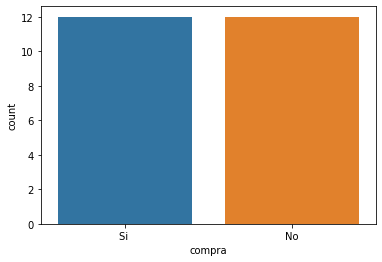

In [ ]:
#Análisis gráfico de la variable objetivo
sns.countplot(x=caso1["compra"])
plt.show();

In [ ]:
#Resumen de las variables
caso1.describe()

,Gastos,Ingresos,Tamaño lote
count,24.000000,24.000000,24.000000
mean,15.958333,68.437500,18.950000
std,9.200563,19.793144,2.428275
min,2.000000,33.000000,14.000000
25%,8.250000,52.350000,17.500000
50%,15.000000,64.800000,19.000000
75%,25.250000,83.100000,20.800000
max,28.000000,110.100000,23.600000


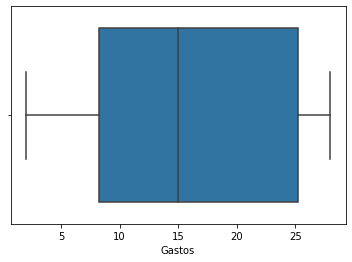

In [ ]:
#Análisis gráfico de las variables
sns.boxplot(x=caso1["Gastos"]);

In [ ]:
#Realizar gráfico para los otras variables

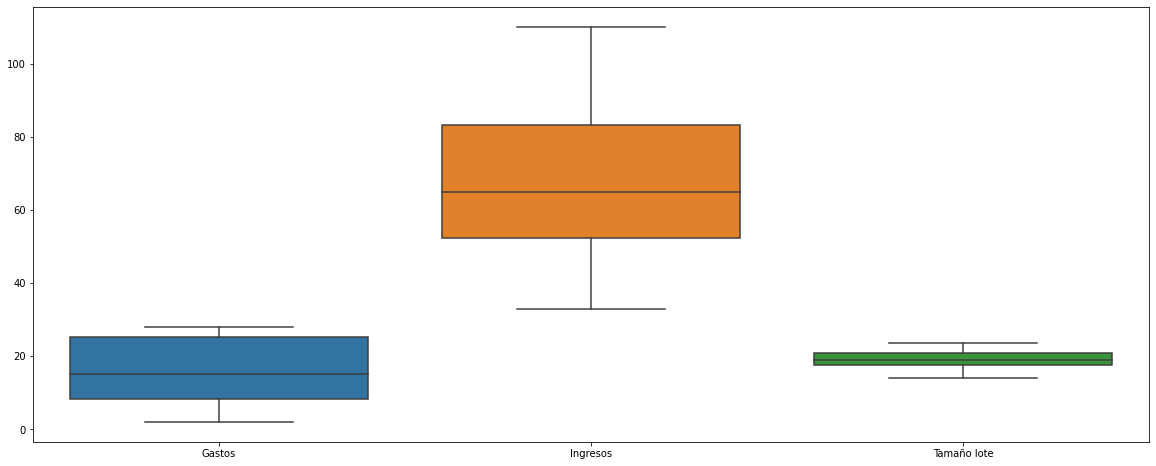

In [ ]:
#Realizar gráfico con todas las variables
plt.figure(figsize=(20,8))
sns.boxplot( data = caso1 )
plt.show()

In [1]:
#Análsis grafico de cajas comparando la variable objetivo
sns.boxplot(x="compra", y="Gastos", data=caso1,linewidth=3 );
plt.show()

NameError: ignored

In [ ]:
##Análsis grafico de cajas comparando todas las covaribles con la variable objetivo
caso1.boxplot(by="compra", figsize=(12, 6))
plt.show()

# Estandarización de variables

En machine learning se maneja varios tipos de datos, por ejemplo, los ingresos, la edad, el número de productos, señales de audio y valores de píxeles para datos de imagen, y estos datos pueden incluir múltiples dimensiones.

**La estandarización de características** hace que los valores de cada característica en los datos tengan media cero (al restar la media en el numerador) y varianza unitaria.

Este método se usa ampliamente para la normalización en muchos algoritmos de machine learning (por ejemplo, máquinas de vectores de soporte , regresión logística y redes neuronales artificiales ).

El método general de cálculo es determinar la media de distribución y la desviación estándar para cada función. A continuación, restamos la media de cada característica. Luego dividimos los valores (la media ya se resta) de cada característica por su desviación estándar.

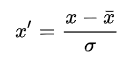

## Normalización

normalización mínima-máxima

También conocido como escalado mínimo-máximo o normalización mínimo-máximo, es el método más simple y consiste en reescalar el rango de características para escalar el rango en [0, 1] o [−1, 1]. La selección del rango objetivo depende de la naturaleza de los datos. La fórmula general para un mínimo-máximo de [0, 1] se da como:

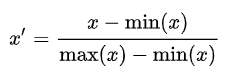

In [ ]:
#Escalando manualmente
var_escalada=(caso1['Gastos'] - caso1['Gastos'].mean())/caso1['Gastos'].std()
var_escalada

0     1.308797
1    -1.082361
2     0.439285
3     0.004529
4    -0.212849
5     1.200108
6     0.656663
7    -1.082361
8     0.982730
9    -0.321538
10    1.200108
11    1.200108
12   -1.408428
13   -0.538916
14    1.200108
15   -0.321538
16   -0.756294
17   -1.517117
18    0.982730
19    0.004529
20   -1.299739
21    1.091419
22   -1.517117
23   -0.212849
Name: Gastos, dtype: float64

In [ ]:
# Estandarizamos las variables
caso_ob= caso1[caso1.columns[0:3]]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaled_features =scaler.fit_transform(caso_ob)
caso_scal = pd.DataFrame(scaled_features, index=caso_ob.index, columns=caso_ob.columns)
caso_scal.head()

,Gastos,Ingresos,Tamaño lote
0,1.336946,-0.435452,-0.231370
1,-1.105641,0.880582,-0.904445
2,0.448733,-0.187728,1.114781
3,0.004626,-0.358039,0.778243
4,-0.217427,0.957995,1.956125


In [ ]:
#Escalando utilizandonormalización mínima-máxima
from sklearn.preprocessing import MinMaxScaler
scaler2 = MinMaxScaler()
scaled_features2 =scaler2.fit_transform(caso_ob)
caso_scal2 = pd.DataFrame(scaled_features2, index=caso_ob.index, columns=caso_ob.columns)
caso_scal2.head()

,Gastos,Ingresos,Tamaño lote
0,1.000000,0.350195,0.458333
1,0.153846,0.680934,0.291667
2,0.692308,0.412451,0.791667
3,0.538462,0.369650,0.708333
4,0.461538,0.700389,1.000000


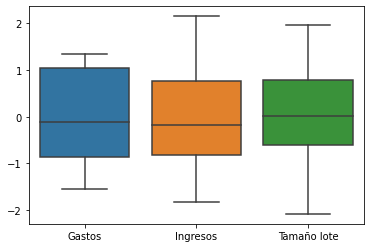

In [ ]:
# Boxplots con variables estadnarizadas
sns.boxplot( data = caso_scal);

In [ ]:
#Eliminar atípicos
caso2=caso_scal[caso_scal.apply(lambda x: np.abs(x - x.mean()) / x.std() < 4).all(axis=1)]
print(caso_scal.shape)

(24, 3)


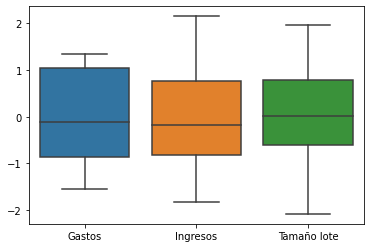

In [ ]:
sns.boxplot(data=caso2 );

In [ ]:
y =   caso1[caso1.columns[3]]
y

0     Si 
1     Si 
2     Si 
3     Si 
4     Si 
5     Si 
6     Si 
7     Si 
8     Si 
9     Si 
10    Si 
11    Si 
12     No
13     No
14     No
15     No
16     No
17     No
18     No
19     No
20     No
21     No
22     No
23     No
Name: compra, dtype: object

In [ ]:
#Unir dataFrame
caso_completo = pd.concat([caso2, y], axis=1)
caso_completo.head()

,Gastos,Ingresos,Tamaño lote,compra
0,1.336946,-0.435452,-0.231370,Si
1,-1.105641,0.880582,-0.904445,Si
2,0.448733,-0.187728,1.114781,Si
3,0.004626,-0.358039,0.778243,Si
4,-0.217427,0.957995,1.956125,Si


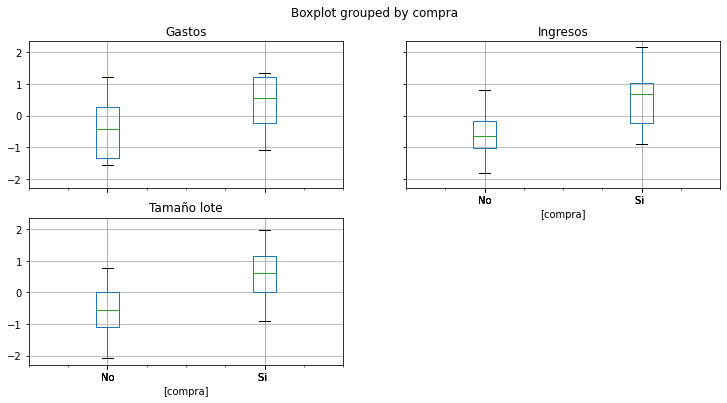

In [ ]:
  ##Análsis grafico de cajas comparando todas las covaribles con la variable objetivo
caso_completo.boxplot(by="compra",figsize=(12, 6))
plt.show()

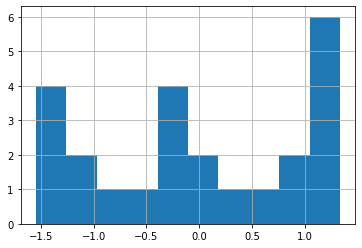

In [ ]:
# Histograma
caso_completo.Gastos.hist();

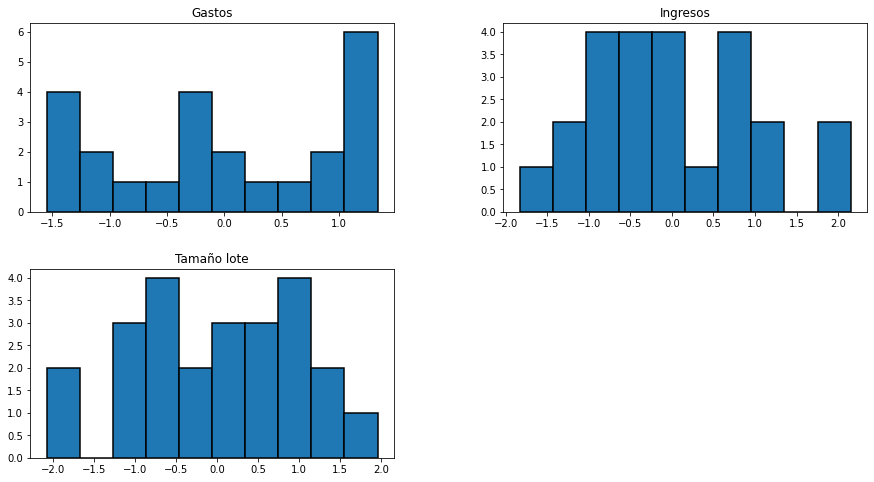

In [ ]:
# Histogramas
caso_completo.hist(edgecolor='black', linewidth=1.5, grid=False, figsize=(15, 8))
plt.show()

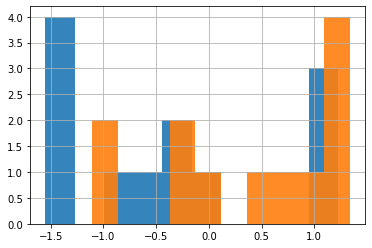

In [ ]:
#Histogramas por grupo
caso_completo.groupby('compra')['Gastos'].hist(alpha=0.9);

In [ ]:
sns.distplot(caso_completo["Gastos"],bins=10);
plt.show()

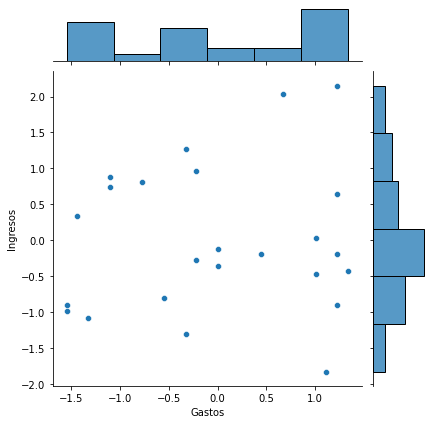

In [ ]:
#Scatterplot donde salen también histogramas
fig=sns.jointplot(x='Gastos',y='Ingresos',data=caso_completo)

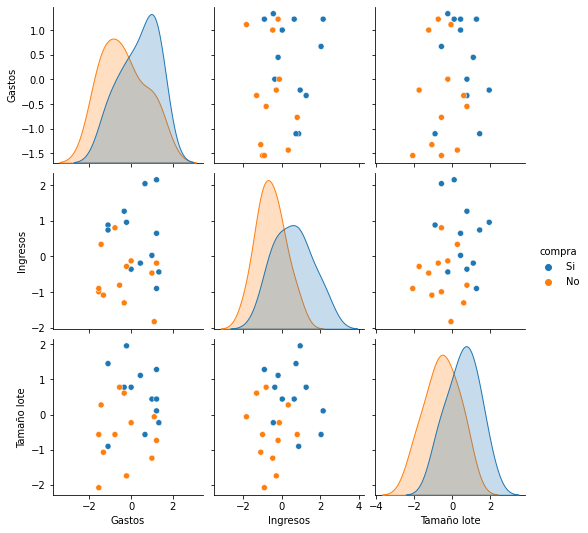

In [ ]:
#Graficar todo en uno
sns.pairplot(caso_completo, hue='compra')
plt.show()

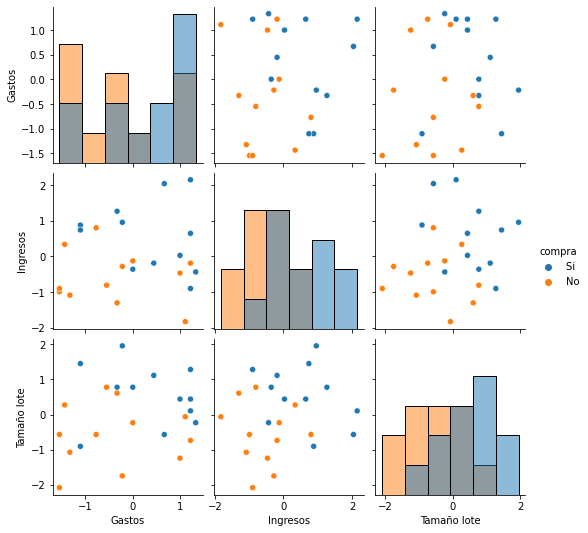

In [ ]:
#Cambiando la diagonal
sns.pairplot(caso_completo, hue='compra', diag_kind='hist')
plt.show()

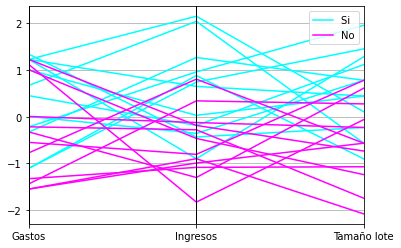

In [ ]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(caso_completo, "compra",colormap='cool')
plt.show()

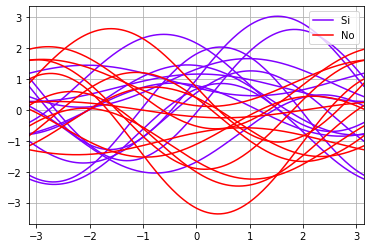

In [ ]:
from pandas.plotting import andrews_curves
andrews_curves(caso_completo,"compra",colormap='rainbow')
plt.show()

In [ ]:
caso_completo.corr()

,Gastos,Ingresos,Tamaño lote
Gastos,1.000000,0.087606,0.180109
Ingresos,0.087606,1.000000,0.172151
Tamaño lote,0.180109,0.172151,1.000000
